## Análisis del laboratorio de masa

In [1]:
# Import necessary libraries
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np


In [2]:
# Import custom libraries
import warnings
import sys
import os

# Subir dos niveles desde notebooks/mod_tecnico/ hasta la raíz del repo
repo_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))  
sys.path.append(repo_path)

# Ahora intenta importar
from src.data_processing import ready_to_import


In [3]:
# Import data
# Import data from Excel files
masa = pd.read_excel('C:/Users/Miguel Oscar/Projects/data-INSCO-hub/data/raw/masa.xlsx')

In [4]:
# Resumen estadístico de la tabla
masa.describe()

,lab_received_date,cleaning_date,calibration_date,scheduled_delivery_date,delivery_date,lead_time,assigned_time,number_of_items
count,434,429,432,428,434,434.000000,434.000000,434.000000
mean,2025-01-21 04:38:42.580645120,2025-01-21 04:45:18.881118976,2025-01-30 17:56:39.999999744,2025-02-10 10:22:25.794392576,2025-02-03 22:13:49.493087488,8.956221,13.370968,4.725806
min,2024-11-06 00:00:00,2024-03-12 00:00:00,2024-03-13 00:00:00,2024-12-19 00:00:00,2025-01-02 00:00:00,0.000000,0.000000,1.000000
25%,2025-01-14 00:00:00,2025-01-13 00:00:00,2025-01-22 00:00:00,2025-01-31 00:00:00,2025-01-24 00:00:00,6.000000,12.000000,1.000000
50%,2025-01-14 00:00:00,2025-01-20 00:00:00,2025-01-24 00:00:00,2025-02-05 00:00:00,2025-01-27 00:00:00,8.000000,15.000000,1.000000
75%,2025-02-12 00:00:00,2025-02-12 00:00:00,2025-02-18 00:00:00,2025-02-26 00:00:00,2025-02-19 00:00:00,10.000000,15.000000,2.000000
max,2025-03-11 00:00:00,2025-03-28 00:00:00,2025-03-28 00:00:00,2025-03-26 00:00:00,2025-03-14 00:00:00,44.000000,30.000000,58.000000
std,NaN,NaN,NaN,NaN,NaN,5.806377,4.596232,8.422774


**Podemos notar que hay columnas que tienen mal el tipo de variable**<br>
**Se debe cambiar las columnas que contienen fechas al tipo 'datetime'**

In [5]:
# Ver los tipos de datos de cada columna con más detalle
masa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            434 non-null    object        
 1   os                       434 non-null    object        
 2   lab_received_date        434 non-null    datetime64[ns]
 3   cleaning_date            429 non-null    datetime64[ns]
 4   classification           400 non-null    object        
 5   calibration_date         432 non-null    datetime64[ns]
 6   assignee                 644 non-null    object        
 7   supervisor               434 non-null    object        
 8   calibrator               433 non-null    object        
 9   approver                 432 non-null    object        
 10  scheduled_delivery_date  428 non-null    datetime64[ns]
 11  delivery_date            434 non-null    datetime64[ns]
 12  lead_time                434 non-nul

In [6]:
# Seleccionamos las columnas que contienen fechas y las convertimos a tipo datetime
col_fechas = [col for col in masa.columns if 'date' in col.lower() or 'fecha' in col.lower()]

for col in col_fechas:
    masa[col] = pd.to_datetime(masa[col], errors='coerce', format='%Y/%m/%d')

In [7]:
masa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            434 non-null    object        
 1   os                       434 non-null    object        
 2   lab_received_date        434 non-null    datetime64[ns]
 3   cleaning_date            429 non-null    datetime64[ns]
 4   classification           400 non-null    object        
 5   calibration_date         432 non-null    datetime64[ns]
 6   assignee                 644 non-null    object        
 7   supervisor               434 non-null    object        
 8   calibrator               433 non-null    object        
 9   approver                 432 non-null    object        
 10  scheduled_delivery_date  428 non-null    datetime64[ns]
 11  delivery_date            434 non-null    datetime64[ns]
 12  lead_time                434 non-nul

In [8]:
# Se hace una copia de la tabla para evitar problemas de referencia
mass = masa.copy()

**Se eliminan las filas donde 'report_number' es NaN y se une el contenido de 'assignee' de las filas con 'report_number' NaN a la fila anterior**

In [9]:
# Esta función es interna y creada para el proceso en el que se va a usar
mass = ready_to_import.to_prepare_db(mass)

In [10]:
# Verificamos nuevamente los tipos de datos de cada columna y la cantidad de datos nulos
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            434 non-null    object        
 1   os                       434 non-null    object        
 2   lab_received_date        434 non-null    datetime64[ns]
 3   cleaning_date            429 non-null    datetime64[ns]
 4   classification           400 non-null    object        
 5   calibration_date         432 non-null    datetime64[ns]
 6   assignee                 434 non-null    object        
 7   supervisor               434 non-null    object        
 8   calibrator               433 non-null    object        
 9   approver                 432 non-null    object        
 10  scheduled_delivery_date  428 non-null    datetime64[ns]
 11  delivery_date            434 non-null    datetime64[ns]
 12  lead_time                434 non-nul

### Eliminamos todos los reportes que no son calibraciones

In [11]:
# Se eliminan las filas que no son calibraciones
mass = mass[~mass['report_number'].str.startswith('RSM', na=False)]

In [12]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 433
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            366 non-null    object        
 1   os                       366 non-null    object        
 2   lab_received_date        366 non-null    datetime64[ns]
 3   cleaning_date            361 non-null    datetime64[ns]
 4   classification           349 non-null    object        
 5   calibration_date         366 non-null    datetime64[ns]
 6   assignee                 366 non-null    object        
 7   supervisor               366 non-null    object        
 8   calibrator               366 non-null    object        
 9   approver                 364 non-null    object        
 10  scheduled_delivery_date  362 non-null    datetime64[ns]
 11  delivery_date            366 non-null    datetime64[ns]
 12  lead_time                366 non-null    

# Análisis Preliminar del DataFrame "mass"

## Estructura General
- **Filas**: 366 entradas.
- **Columnas**: 18 en total.
- **Tipos de datos**:
  - `datetime64[ns]`: 5 columnas (fechas).
  - `float64`: 3 columnas (valores numéricos).
  - `object`: 10 columnas (texto o categorías).

## Valores Faltantes
| Columna                   | No. Faltantes | Observación                              |
|---------------------------|---------------|------------------------------------------|
| `cleaning_date`           | 5             |                                          |
| `classification`          | 17            |                                          |
| `approver`                | 2             |                                          |
| `scheduled_delivery_date` | 4             |                                          |
| `substitution_reason`     | 349           | Muy escasos (solo 17 no nulos)          |

**Acciones sugeridas**:  
- Eliminar `substitution_reason` por su alta tasa de faltantes.  
- Imputar valores en columnas con pocos faltantes (ej: `approver` con 2 faltantes).  

---

## Columnas Temporales
- **Fechas clave**:  
  - `lab_received_date`: Recepción en laboratorio.  
  - `cleaning_date`: Fecha de limpieza.  
  - `calibration_date`: Fecha de calibración.  
  - `scheduled_delivery_date`: Entrega programada.  
  - `delivery_date`: Entrega real.  

**Análisis posibles**:  
- Calcular el tiempo total de proceso: `delivery_date - lab_received_date`.  
- Identificar retrasos: Comparar `delivery_date` vs. `scheduled_delivery_date`.  

---

## Variables Numéricas
- **Columnas**:  
  - `lead_time`: Tiempo de calibración.  
  - `assigned_time`: Tiempo asignado.  
  - `number_of_items`: Cantidad de piezas.  

**Recomendaciones**:  
- Buscar **outliers** (ej: `assigned_time` extremo).  
- Analizar correlaciones (ej: ¿Mayor `number_of_items` implica mayor `lead_time`?).  

---

## Variables Categóricas
- **Personal**:  
  - `assignee`, `supervisor`, `calibrator`, `approver`.  
  - **Uso**: Evaluar eficiencia o distribución de carga laboral.  

- **Segmentación clave**:  
  - `priority`: Prioridad del servicio (ej: alta, media, baja).  
  - `service_location`: Ubicación del servicio (para optimizar logística).  

---

## Pasos Siguientes
1. **Limpieza**:  
   - Eliminar `substitution_reason`.  
   - Validar órdenes temporales (ej: ¿`cleaning_date` ≤ `calibration_date`?).  
2. **Análisis Exploratorio**:  
   - Distribución de `priority` y su impacto en tiempos.  
   - Correlación entre `number_of_items` y `assigned_time`.  
3. **Visualización**:  
   - Histogramas para variables numéricas.  
   - Heatmap de correlaciones.  
   - Gráficos de barras para prioridades y ubicaciones.  

**Objetivo**: Optimizar tiempos de entrega y asignación de recursos según prioridad y ubicación.  

# Análisis de los errores de sustitución

In [13]:
# Obtenemos la cantidad de reportes por cada razón de sustitución
subs_reason = mass.groupby('substitution_reason')['report_number'].count().sort_values(ascending=False)


In [14]:
#Importar librerias para graficar
from matplotlib import pyplot as plt
import seaborn as sns

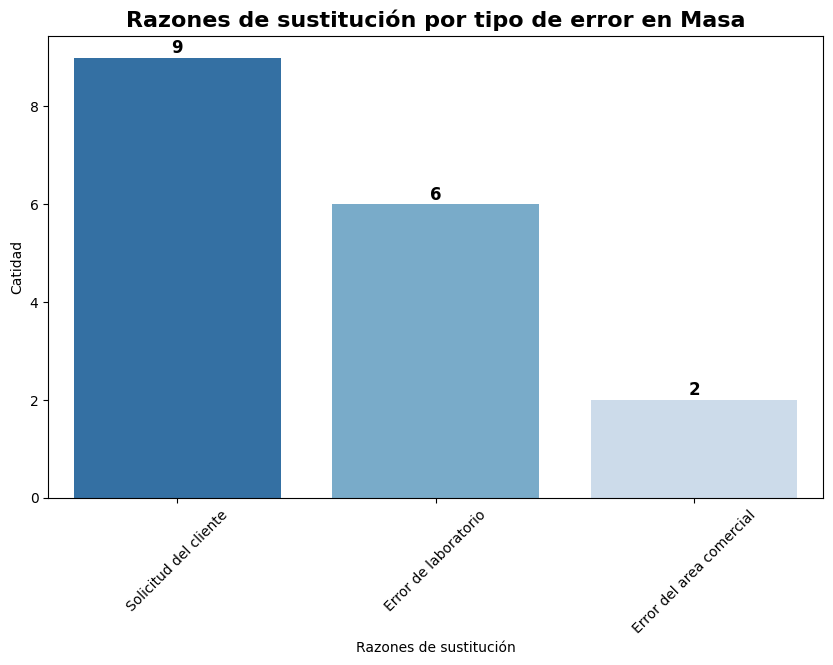

In [15]:
# Crear figura
plt.figure(figsize=(10, 6))

# Gráfico de barras con Seaborn
ax = sns.barplot(x=subs_reason.index, y=subs_reason.values, hue=subs_reason.index, palette='Blues_r', legend=False)

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Razones de sustitución')
plt.ylabel('Catidad')
plt.title('Razones de sustitución por tipo de error en Masa', fontsize=16, fontweight='bold')

# Agregar etiquetas en las barras
for i, v in enumerate(subs_reason.values):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=12, fontweight='bold')

# Mostrar gráfico
plt.show()


#### Clasificación por metrólogo y tipos de errores

In [16]:
# Agrupar por 'assignee' y contar errores por tipo de 'substitution_reason'
errores_por_assignee = (
    mass.groupby(['assignee', 'substitution_reason'])  # Agrupar por persona y tipo de error
        .size()                                   # Contar ocurrencias
        .unstack(fill_value=0)                    # Convertir a formato tabla
        .reset_index()                            # Convertir índice a columna
)

# Ordenar por el total de errores (opcional)
errores_por_assignee['Total'] = errores_por_assignee.count(axis=1)
errores_por_assignee = errores_por_assignee.sort_values('Total', ascending=False).drop('Total', axis=1)

# Mostrar resultado
errores_por_assignee

substitution_reason,assignee,Error de laboratorio,Error del area comercial,Solicitud del cliente
0,Eva Maria Arevalo Jimenez,0,0,5
1,Francisco Torres Cabrera,3,1,0
2,Gabriel Gallardo Camacho,0,0,2
3,Leobardo Maximiliano Brito Fonseca,2,1,0
4,Mario de Jesus Garcia,1,0,2


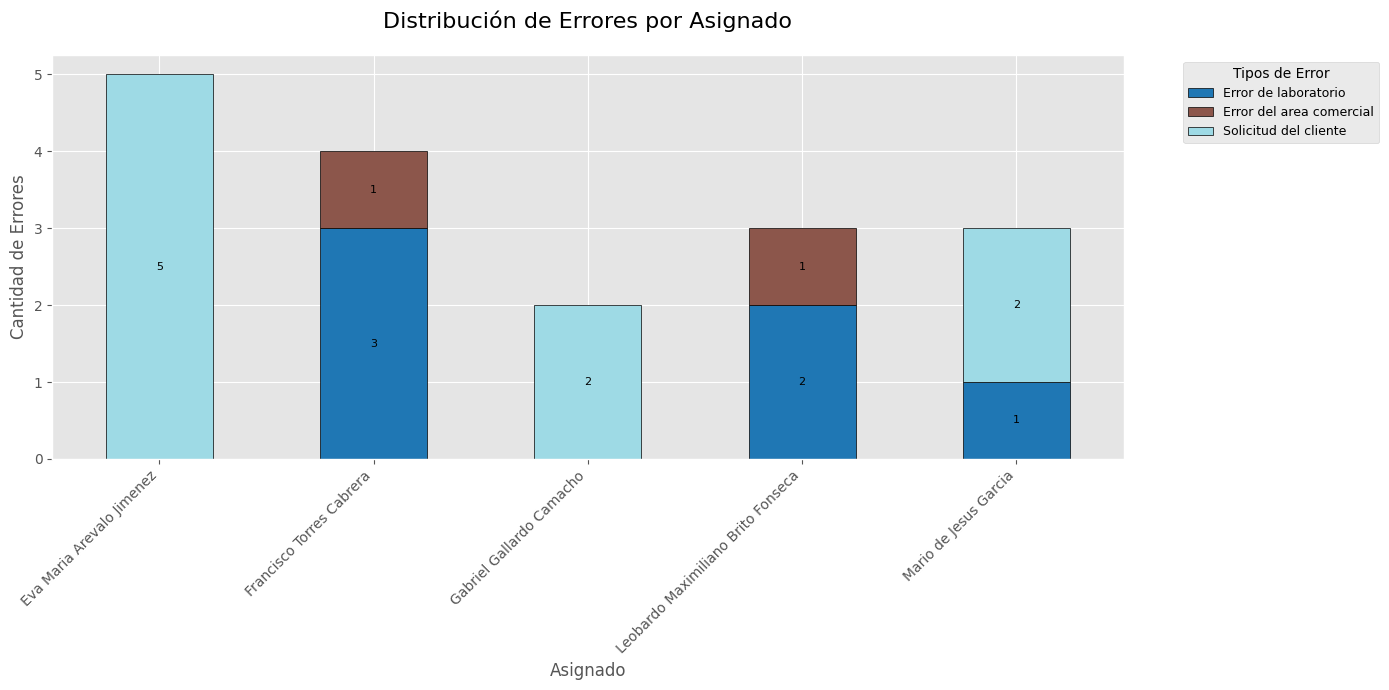

In [17]:
# Configurar el estilo
plt.style.use('ggplot')

# Crear gráfico de barras apiladas
ax = errores_por_assignee.set_index('assignee').plot(
    kind='bar', 
    stacked=True,
    figsize=(14, 7),
    colormap='tab20',  # Paleta de colores para múltiples categorías
    edgecolor='black',
    linewidth=0.5
)

# Personalizar el gráfico
plt.title('Distribución de Errores por Asignado', fontsize=16, pad=20)
plt.xlabel('Asignado', fontsize=12)
plt.ylabel('Cantidad de Errores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas de totales
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:  # Mostrar solo etiquetas para barras con valores
        ax.text(rect.get_x() + rect.get_width()/2, 
                rect.get_y() + height/2, 
                f'{int(height)}', 
                ha='center', 
                va='center',
                fontsize=8,
                color='black')

# Mejorar la leyenda
plt.legend(
    title='Tipos de Error',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    frameon=True
)

# Ajustar márgenes
plt.tight_layout()
plt.show()

#### Tipos de errores vs Calsificación de equipo

In [18]:
# 1. Crear una copia del DataFrame para preservar los datos originales
df_temp = mass.copy()

# 2. Identificar errores no clasificados (NaN)
df_temp['classification'] = df_temp['classification'].fillna('No clasificado')  # Renombrar NaN

# 3. Agrupar incluyendo la nueva categoría
errores_por_classification = (
    df_temp.groupby(['classification', 'substitution_reason'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
)

# 4. Calcular el TOTAL correcto (suma de razones)
columnas_errores = errores_por_classification.columns.difference(['classification'])
errores_por_classification['Total'] = errores_por_classification[columnas_errores].sum(axis=1)

# 5. Ordenar y mostrar
errores_por_classification = errores_por_classification.sort_values('Total', ascending=False)
errores_por_classification

substitution_reason,classification,Error de laboratorio,Error del area comercial,Solicitud del cliente,Total
0,E2,3,2,5,10
1,F1,3,0,2,5
2,No clasificado,0,0,2,2


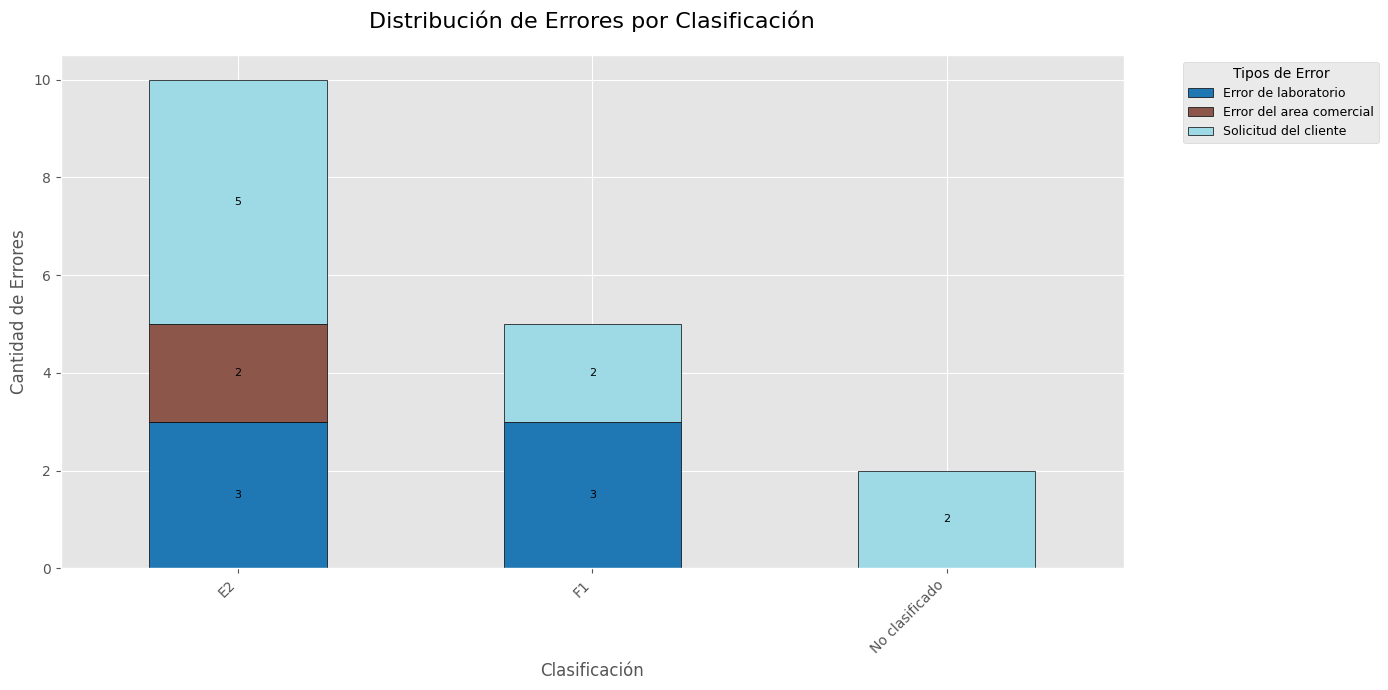

In [19]:
# Configurar el estilo
plt.style.use('ggplot')

# Crear gráfico de barras apiladas
errores_por_classification = errores_por_classification.drop(columns='Total', errors='ignore')  # Eliminar la columna 'Total' para el gráfico
ax = errores_por_classification.set_index('classification').plot(
    kind='bar', 
    stacked=True,
    figsize=(14, 7),
    colormap='tab20',  # Paleta de colores para múltiples categorías
    edgecolor='black',
    linewidth=0.5
)

# Personalizar el gráfico
plt.title('Distribución de Errores por Clasificación', fontsize=16, pad=20)
plt.xlabel('Clasificación', fontsize=12)
plt.ylabel('Cantidad de Errores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas de totales
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:  # Mostrar solo etiquetas para barras con valores
        ax.text(rect.get_x() + rect.get_width()/2, 
                rect.get_y() + height/2, 
                f'{int(height)}', 
                ha='center', 
                va='center',
                fontsize=8,
                color='black')

# Mejorar la leyenda
plt.legend(
    title='Tipos de Error',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    frameon=True
)

# Ajustar márgenes
plt.tight_layout()
plt.show()

#### Eliminar las filas que contienen los informes que corresponden a las sustituciones por errores

In [20]:
mass_sin_errores = mass.drop(mass[mass['substitution_reason'].notna()].index)

In [21]:
mass_sin_errores = mass_sin_errores.drop(columns=['substitution_reason'], errors='ignore')
mass_sin_errores.head(10)

,report_number,os,lab_received_date,cleaning_date,classification,calibration_date,assignee,supervisor,calibrator,approver,scheduled_delivery_date,delivery_date,lead_time,assigned_time,service_location,priority,number_of_items
0,CCM0307.M/2025,I0392,2025-03-11,2025-03-12,F1,2025-03-13,Sergio Cruz Santiago,Gabriel Gallardo Camacho,Sergio Cruz Santiago,Gabriel Gallardo Camacho,2025-03-26,2025-03-14,3.0,10.0,LAB,ORDINARIO,1.0
1,CCM0308.M/2025,I0392,2025-03-11,2025-03-12,F2,2025-03-13,Sergio Cruz Santiago,Gabriel Gallardo Camacho,Sergio Cruz Santiago,Gabriel Gallardo Camacho,2025-03-26,2025-03-14,3.0,10.0,LAB,ORDINARIO,1.0
2,CCM0283.M/2025,I0348,2025-03-05,2025-03-05,1,2025-03-12,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,2025-03-21,2025-03-12,5.0,11.0,LAB,ORDINARIO,1.0
3,CCM0284.M/2025,I0350,2025-03-05,2025-03-06,F1,2025-03-13,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Francisco Torres Cabrera,Gabriel Gallardo Camacho,2025-03-21,2025-03-14,7.0,11.0,LAB,ORDINARIO,12.0
4,CCM0285.M/2025,I0350,2025-03-05,2025-03-06,F1,2025-03-13,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Francisco Torres Cabrera,Gabriel Gallardo Camacho,2025-03-21,2025-03-14,7.0,11.0,LAB,ORDINARIO,4.0
8,CCM0309.M/2025,I0392,2025-03-11,2025-03-12,F1,2025-03-13,Sergio Cruz Santiago,Gabriel Gallardo Camacho,Sergio Cruz Santiago,Gabriel Gallardo Camacho,2025-03-26,2025-03-14,3.0,10.0,LAB,ORDINARIO,1.0
9,CCM0275.M/2025,I0335,2025-03-04,2025-03-04,F1,2025-03-10,Sergio Cruz Santiago,Francisco Torres Cabrera,Sergio Cruz Santiago,Francisco Torres Cabrera,2025-03-20,2025-03-12,6.0,11.0,LAB,ORDINARIO,1.0
10,CCM0276.M/2025,I0335,2025-03-04,2025-03-04,F1,2025-03-11,Sergio Cruz Santiago,Francisco Torres Cabrera,Sergio Cruz Santiago,Francisco Torres Cabrera,2025-03-20,2025-03-12,6.0,11.0,LAB,ORDINARIO,1.0
11,CCM0277.M/2025,I0335,2025-03-04,2025-03-04,F1,2025-03-11,Sergio Cruz Santiago,Francisco Torres Cabrera,Sergio Cruz Santiago,Francisco Torres Cabrera,2025-03-20,2025-03-12,6.0,11.0,LAB,ORDINARIO,1.0
12,CCM0310.M/2025,I0392,2025-03-11,2025-03-12,F1,2025-03-13,Sergio Cruz Santiago,Gabriel Gallardo Camacho,Sergio Cruz Santiago,Gabriel Gallardo Camacho,2025-03-26,2025-03-14,3.0,10.0,LAB,ORDINARIO,1.0


#### Comenzamos a trabajar sobre esta nueva tabla

In [22]:
# Verificamos la información de la tabla
mass_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 0 to 433
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            349 non-null    object        
 1   os                       349 non-null    object        
 2   lab_received_date        349 non-null    datetime64[ns]
 3   cleaning_date            344 non-null    datetime64[ns]
 4   classification           334 non-null    object        
 5   calibration_date         349 non-null    datetime64[ns]
 6   assignee                 349 non-null    object        
 7   supervisor               349 non-null    object        
 8   calibrator               349 non-null    object        
 9   approver                 347 non-null    object        
 10  scheduled_delivery_date  345 non-null    datetime64[ns]
 11  delivery_date            349 non-null    datetime64[ns]
 12  lead_time                349 non-null    

In [25]:
import sys
!{sys.executable} -m pip install pandasql --user

"c:\Users\Miguel" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
pip install pandasql

In [27]:
from pandasql import sqldf
print("¡Listo para usar SQL en pandas!")

¡Listo para usar SQL en pandas!


In [28]:
from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())


In [30]:
resultado = pysqldf("""
    SELECT *
    FROM mass_sin_errores
    WHERE classification IS NULL""")

resultado

,report_number,os,lab_received_date,cleaning_date,classification,calibration_date,assignee,supervisor,calibrator,approver,scheduled_delivery_date,delivery_date,lead_time,assigned_time,service_location,priority,number_of_items
0,CCM0257.M/2025,I0300,2025-02-27 00:00:00.000000,None,None,2025-03-12 00:00:00.000000,Gabriel Gallardo Camacho,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Francisco Torres Cabrera,None,2025-03-13 00:00:00.000000,1.0,0.0,SITIO,ORDINARIO,1.0
1,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
2,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
3,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
4,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
5,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
6,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
7,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
8,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
9,CCM0095.M/2025,I0036,2025-01-14 00:00:00.000000,2025-01-20 00:00:00.000000,None,2025-01-24 00:00:00.000000,"Guillermo Guzman Lopez, Mario de Jesus Garcia,...",Leobardo Maximiliano Brito Fonseca,Mario de Jesus Garcia,Leobardo Maximiliano Brito Fonseca,2025-02-05 00:00:00.000000,2025-01-24 00:00:00.000000,8.0,15.0,LAB,ORDINARIO,1.0
